<a href="https://colab.research.google.com/github/Pawan300/digit-recognition/blob/master/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/DIGIT recognisation/test.csv")
train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/DIGIT recognisation/train.csv")

In [14]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X=train.iloc[:,1:]

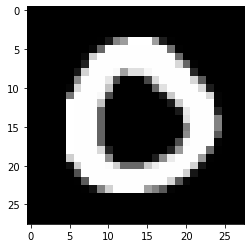

In [16]:
def plot(i,data,j):
  plt.imshow(np.array(data.iloc[i]).reshape(28,28), cmap=cm.gray)
  plt.figure(j)

plot(4,X,1)

In [0]:
x_train,x_test,x_train_label,x_test_label=train_test_split(X,train['label'],train_size=0.8)

# kPca imlementation(kernel PCA)

In [0]:
m = np.mean(X, axis=0) # array([16.25, 26.25])
std = np.std(X, axis=0)

In [0]:
for i in range(len(std)):
  if(std[i]!=0):
    X[X.columns[i]]=0.07957/std[i]* np.exp(-0.5/std[i]**2*(X[X.columns[i]]-m[i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
def pca_model2(data,component):
    cov_mat=np.cov(data,rowvar=False)
    eigen=np.linalg.eigh(cov_mat)
    pca=np.matrix(eigen[1][-component:])
    x_bar=(pca.T.dot(pca.dot(data.T))).T
    return(x_bar)

In [0]:
def plot2(l):
  for i in range(len(l)):
    res=pca_model2(X,l[i])
    plot(4,pd.DataFrame(res),i)

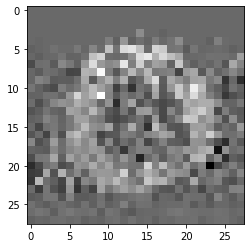

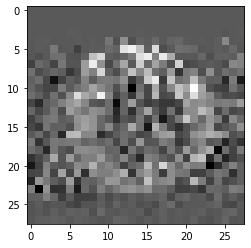

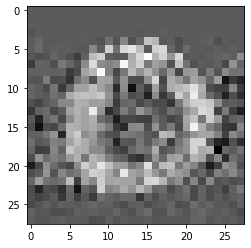

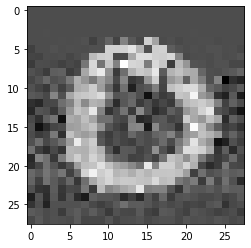

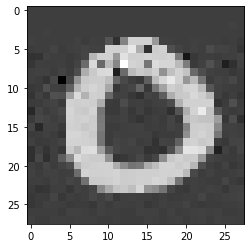

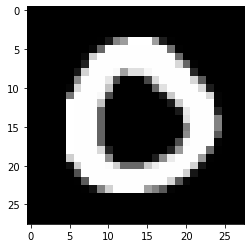

<Figure size 432x288 with 0 Axes>

In [146]:
plot2([100,300,400,500,600,700,784])

### Autoencoders

In [8]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

### Single layer

In [9]:
layer_size=64
input_shape=Input(shape=(784,))

encoded=Dense(layer_size,activation='tanh')(input_shape)

decoded=Dense(784,activation='sigmoid')(encoded)

autoencoder=Model(input_shape,decoded)

autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

encoder = Model(input_shape, encoded)
encoded_input = Input(shape=(layer_size,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


### Mulitlayer

In [0]:
layer_size = 64

input_shape = Input(shape=(784,))

# Encoder
hidden_1 = Dense(layer_size, activation='relu')(input_shape)
encoded = Dense(64, activation='relu')(hidden_1)

# Decoder
hidden_2 = Dense(layer_size, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)

autoencoder = Model(input_shape,decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

encoder = Model(input_shape, encoded)
encoded_input = Input(shape=(layer_size,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [131]:
autoencoder.summary()

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 784)               50960     
Total params: 109,520
Trainable params: 109,520
Non-trainable params: 0
_________________________________________________________________


In [18]:
train=train.drop('label',axis=1)
autoencoder.fit(train,train,epochs=50,batch_size=128,shuffle=True,
                validation_data=(x_test, x_test))

Train on 42000 samples, validate on 8400 samples
Epoch 1/50
42000/42000 [==============================] - 5s 112us/sample - loss: -2.3149 - val_loss: -2.7649
Epoch 2/50
42000/42000 [==============================] - 5s 111us/sample - loss: -3.2972 - val_loss: -3.7802
Epoch 3/50
42000/42000 [==============================] - 5s 114us/sample - loss: -4.3710 - val_loss: -4.8901
Epoch 4/50
42000/42000 [==============================] - 5s 113us/sample - loss: -5.5387 - val_loss: -6.0993
Epoch 5/50
42000/42000 [==============================] - 5s 114us/sample - loss: -6.8041 - val_loss: -7.4024
Epoch 6/50
42000/42000 [==============================] - 5s 111us/sample - loss: -8.1682 - val_loss: -8.8086
Epoch 7/50
42000/42000 [==============================] - 5s 113us/sample - loss: -9.6343 - val_loss: -10.3148
Epoch 8/50
42000/42000 [==============================] - 5s 110us/sample - loss: -11.2077 - val_loss: -11.9233
Epoch 9/50
42000/42000 [==============================] - 5s 114us/s

In [0]:
decoder_img=autoencoder.predict(x_test) #this is our reconstructed image we can use them.